In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math

#Q1 - baboon.png

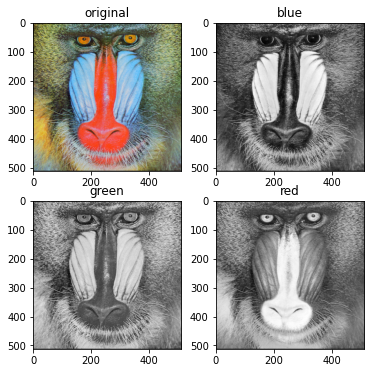

In [2]:
#imagem openCV

img = cv2.imread("baboon.png")

#Separa os canais da imagem
bgr = cv2.split(img)

img_plot = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #-> convertido pois os plots serao em plt, BGR -> RGB

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img_plot) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

#Q2 - rgbcube_KBKG.png

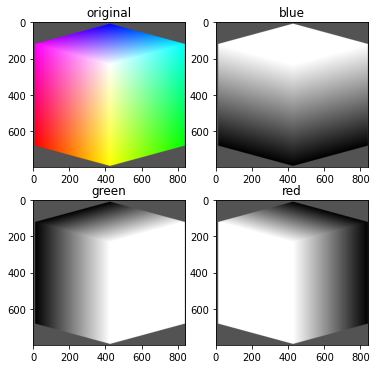

In [3]:
img = cv2.imread("rgbcube_kBKG.png")

#Separa os canais da imagem
bgr = cv2.split(img)

img_plot = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #-> convertido pois os plots serao em plt, BGR -> RGB

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img_plot) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

#Q3 - RGB.png

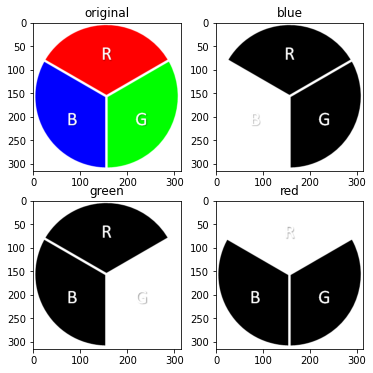

In [4]:
img = cv2.imread("rgb.png")

#Separa os canais da imagem
bgr = cv2.split(img)

img_plot = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #-> convertido pois os plots serao em plt, BGR -> RGB

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img_plot) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

#Q4 - Repetir Q1, Q2, Q3 convertendo as imagens para os seguintes espaços de cor

## Baboon.png

###NTSC

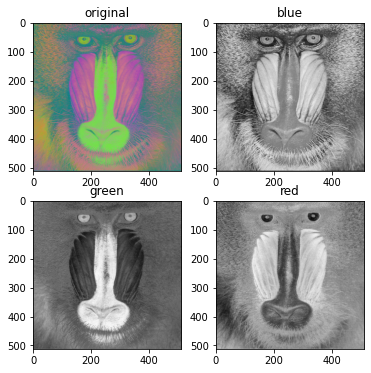

In [5]:
img = cv2.imread("baboon.png") #lida como bgr

img = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb) #BGR -> YCrCb

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

### HSV

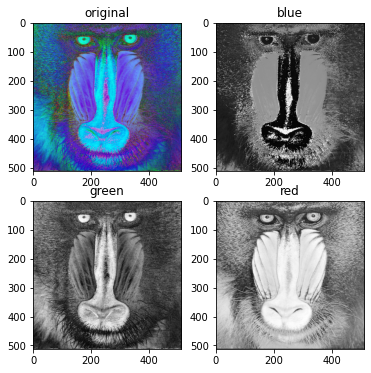

In [6]:
img = cv2.imread("baboon.png") #BGR

img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

### HSI

In [7]:
def RGB_TO_HSI(img):

    with np.errstate(divide='ignore', invalid='ignore'):

        #Load image with 32 bit floats as variable type
        bgr = np.float32(img)/255

        #Separate color channels
        blue = bgr[:,:,0]
        green = bgr[:,:,1]
        red = bgr[:,:,2]

        #Calculate Intensity
        def calc_intensity(red, blue, green):
            return np.divide(blue + green + red, 3)

        #Calculate Saturation
        def calc_saturation(red, blue, green):
            minimum = np.minimum(np.minimum(red, green), blue)
            saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

            return saturation

        #Calculate Hue
        def calc_hue(red, blue, green):
            hue = np.copy(red)

            for i in range(0, blue.shape[0]):
                for j in range(0, blue.shape[1]):
                    hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                                math.sqrt((red[i][j] - green[i][j])**2 +
                                        ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
                    hue[i][j] = math.acos(hue[i][j])

                    if blue[i][j] <= green[i][j]:
                        hue[i][j] = hue[i][j]
                    else:
                        hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]

            return hue

        #Merge channels into picture and return image
        hsi = cv2.merge((calc_hue(red, blue, green), calc_saturation(red, blue, green), calc_intensity(red, blue, green)))
        return hsi

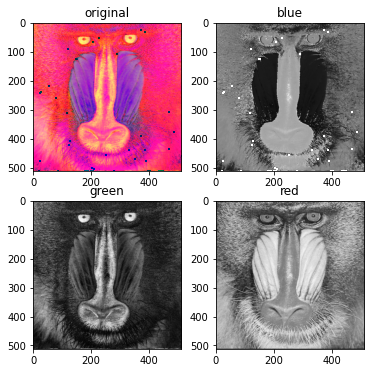

In [8]:
img = cv2.imread("baboon.png") #BGR

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #BGR -> RGB

img = RGB_TO_HSI(img) #-> convertido pois os plots serao em plt, RGB -> HSI

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

### lab

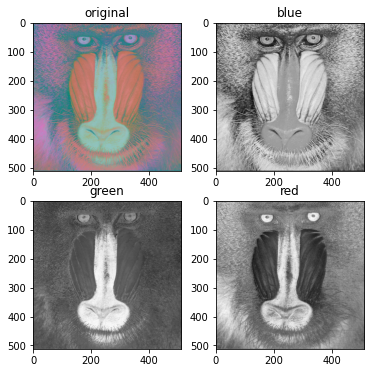

In [9]:
img = cv2.imread("baboon.png") #BGR

img = cv2.cvtColor(img,cv2.COLOR_BGR2Lab)

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

###CIE XYZ

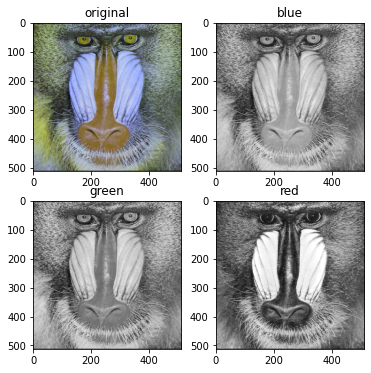

In [10]:
img = cv2.imread("baboon.png") #BGR

img = cv2.cvtColor(img,cv2.COLOR_BGR2XYZ)

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

### CMYK

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


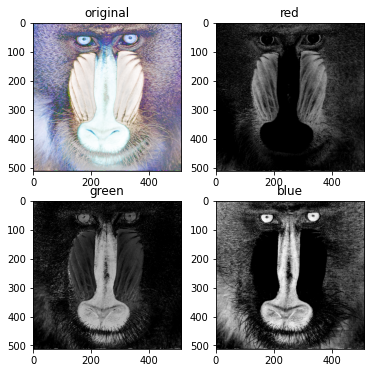

In [11]:
img = cv2.imread("baboon.png") #BGR

img = img.astype(np.float64)/255.
K = 1 - np.max(img, axis=2)
C = (1-img[...,2] - K)/(1-K)
M = (1-img[...,1] - K)/(1-K)
Y = (1-img[...,0] - K)/(1-K)

img = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8) 

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("red"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("blue"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

## rgbcube_KBKG.png

###NTSC

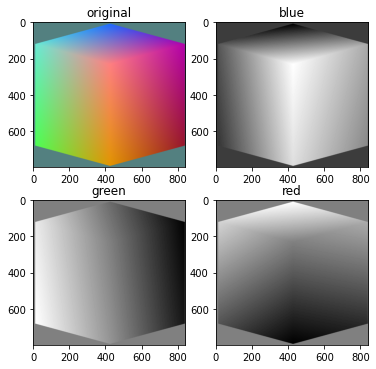

In [12]:
img = cv2.imread("rgbcube_kBKG.png") #lida como bgr

img = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb) #BGR -> YCrCb

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

###HSV

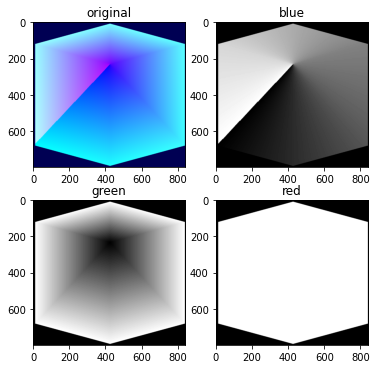

In [13]:
img = cv2.imread("rgbcube_kBKG.png") #BGR

img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

###HSI

In [14]:
def RGB_TO_HSI(img):

    with np.errstate(divide='ignore', invalid='ignore'):

        #Load image with 32 bit floats as variable type
        bgr = np.float32(img)/255

        #Separate color channels
        blue = bgr[:,:,0]
        green = bgr[:,:,1]
        red = bgr[:,:,2]

        #Calculate Intensity
        def calc_intensity(red, blue, green):
            return np.divide(blue + green + red, 3)

        #Calculate Saturation
        def calc_saturation(red, blue, green):
            minimum = np.minimum(np.minimum(red, green), blue)
            saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

            return saturation

        #Calculate Hue
        def calc_hue(red, blue, green):
            hue = np.copy(red)

            for i in range(0, blue.shape[0]):
                for j in range(0, blue.shape[1]):
                    hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                                math.sqrt((red[i][j] - green[i][j])**2 +
                                        ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
                    hue[i][j] = math.acos(hue[i][j])

                    if blue[i][j] <= green[i][j]:
                        hue[i][j] = hue[i][j]
                    else:
                        hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]

            return hue

        #Merge channels into picture and return image
        hsi = cv2.merge((calc_hue(red, blue, green), calc_saturation(red, blue, green), calc_intensity(red, blue, green)))
        return hsi

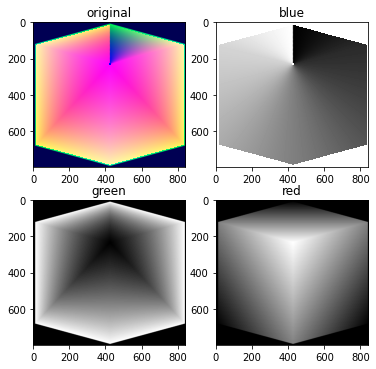

In [15]:
img = cv2.imread("rgbcube_kBKG.png") #BGR

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #BGR -> RGB

img = RGB_TO_HSI(img) #-> convertido pois os plots serao em plt, RGB -> HSI

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

###Lab

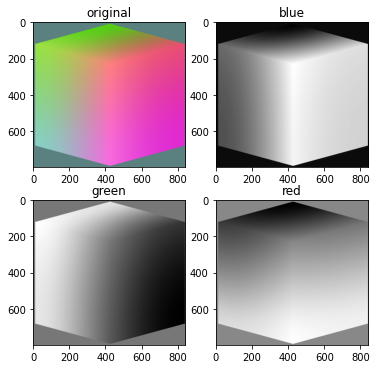

In [16]:
img = cv2.imread("rgbcube_kBKG.png") #BGR

img = cv2.cvtColor(img,cv2.COLOR_BGR2Lab)

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

###CIE XYZ

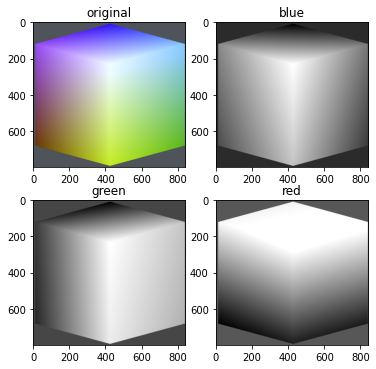

In [17]:
img = cv2.imread("rgbcube_kBKG.png") #BGR

img = cv2.cvtColor(img,cv2.COLOR_BGR2XYZ)

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

### CMYK

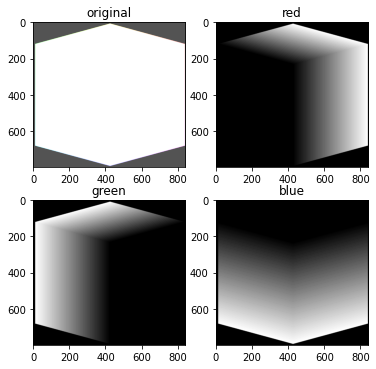

In [18]:

img = cv2.imread("rgbcube_kBKG.png") #BGR

img = img.astype(np.float64)/255.
K = 1 - np.max(img, axis=2)
C = (1-img[...,2] - K)/(1-K)
M = (1-img[...,1] - K)/(1-K)
Y = (1-img[...,0] - K)/(1-K)

img = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("red"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("blue"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

## rgb.png

### NTSC

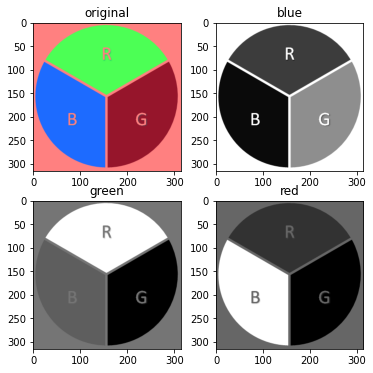

In [19]:
img = cv2.imread("rgb.png") #lida como bgr

img = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb) #BGR -> YCrCb

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

###HSV

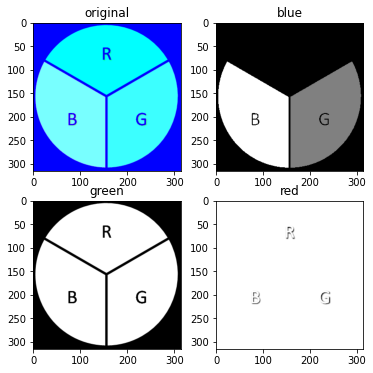

In [20]:
img = cv2.imread("rgb.png") #BGR

img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

###HSI

In [21]:
def RGB_TO_HSI(img):

    with np.errstate(divide='ignore', invalid='ignore'):

        #Load image with 32 bit floats as variable type
        bgr = np.float32(img)/255

        #Separate color channels
        blue = bgr[:,:,0]
        green = bgr[:,:,1]
        red = bgr[:,:,2]

        #Calculate Intensity
        def calc_intensity(red, blue, green):
            return np.divide(blue + green + red, 3)

        #Calculate Saturation
        def calc_saturation(red, blue, green):
            minimum = np.minimum(np.minimum(red, green), blue)
            saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

            return saturation

        #Calculate Hue
        def calc_hue(red, blue, green):
            hue = np.copy(red)

            for i in range(0, blue.shape[0]):
                for j in range(0, blue.shape[1]):
                    hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                                math.sqrt((red[i][j] - green[i][j])**2 +
                                        ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
                    hue[i][j] = math.acos(hue[i][j])

                    if blue[i][j] <= green[i][j]:
                        hue[i][j] = hue[i][j]
                    else:
                        hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]

            return hue

        #Merge channels into picture and return image
        hsi = cv2.merge((calc_hue(red, blue, green), calc_saturation(red, blue, green), calc_intensity(red, blue, green)))
        return hsi

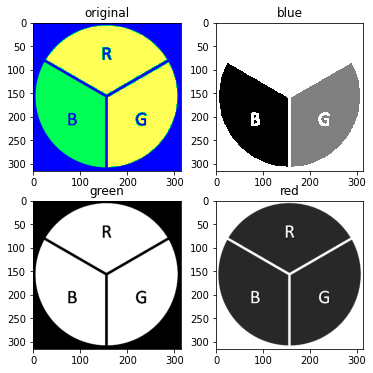

In [22]:
img = cv2.imread("rgb.png") #BGR

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #BGR -> RGB

img = RGB_TO_HSI(img) #-> convertido pois os plots serao em plt, RGB -> HSI

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

###Lab

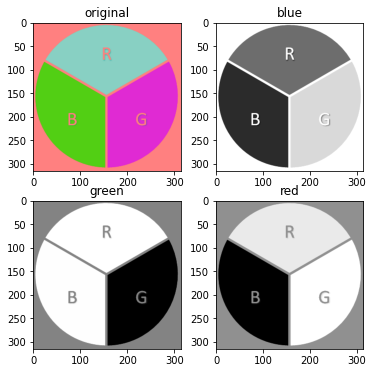

In [23]:
img = cv2.imread("rgb.png") #BGR

img = cv2.cvtColor(img,cv2.COLOR_BGR2Lab)

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

###CIEXYZ

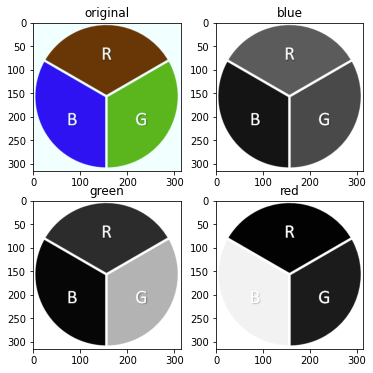

In [24]:
img = cv2.imread("rgb.png") #BGR

img = cv2.cvtColor(img,cv2.COLOR_BGR2XYZ)

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("blue"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("red"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()

###CMYK

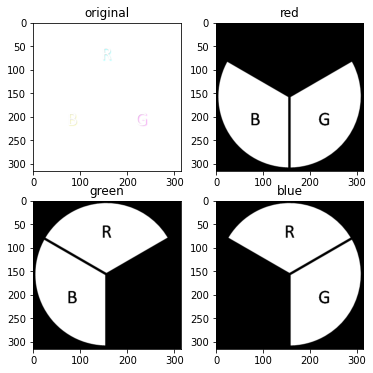

In [25]:
img = cv2.imread("rgb.png") #BGR

img = img.astype(np.float64)/255.
K = 1 - np.max(img, axis=2)
C = (1-img[...,2] - K)/(1-K)
M = (1-img[...,1] - K)/(1-K)
Y = (1-img[...,0] - K)/(1-K)

img = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222); 
plt.title("red"); 
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223); 
plt.title("green"); 
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224); 
plt.title("blue"); 
plt.imshow(bgr[2], cmap='gray')

plt.show()